In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [176]:
url = 'C:/Users/brahi/OneDrive/Escritorio/EarthSurfaceTemperatureData.csv'
df=pd.read_csv(url,sep=';')
df.head(5)

,dt,year,AverageTemperature,Country
0,1/02/1970,1970,21.538,Argentina
1,1/01/1970,1970,20.963,Argentina
2,1/10/1982,1982,10.000,Chile
3,1/10/1995,1995,10.000,Chile
4,1/06/1988,1988,10.000,Uruguay


In [177]:
df['AverageTemperature'] = df['AverageTemperature'].astype('int64')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dt                  5553 non-null   object
 1   year                5553 non-null   int64 
 2   AverageTemperature  5553 non-null   int64 
 3   Country             5553 non-null   object
dtypes: int64(2), object(2)
memory usage: 173.7+ KB


In [179]:
df.describe()

,year,AverageTemperature
count,5553.000000,5553.000000
mean,1991.768594,20.877003
std,12.465035,5.531333
min,1970.000000,1.000000
25%,1981.000000,19.000000
50%,1992.000000,22.000000
75%,2003.000000,25.000000
max,2013.000000,29.000000


[Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '512 (9%)'),
 Text(0, 0, '511 (9%)'),
 Text(0, 0, '478 (9%)'),
 Text(0, 0, '468 (8%)')]

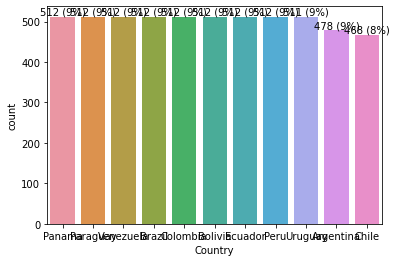

In [180]:
ax = sns.countplot(x=df['Country'],
                   order=df['Country'].value_counts(ascending=False).index);
        
abs_values = df['Country'].value_counts(ascending=False)
rel_values = df['Country'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [181]:
df

,dt,year,AverageTemperature,Country
0,1/02/1970,1970,21,Argentina
1,1/01/1970,1970,20,Argentina
2,1/10/1982,1982,10,Chile
3,1/10/1995,1995,10,Chile
4,1/06/1988,1988,10,Uruguay
...,...,...,...,...
5548,1/07/1996,1996,1,Bolivia
5549,1/04/1995,1995,1,Uruguay
5550,1/04/1983,1983,1,Uruguay
5551,1/06/1983,1983,1,Paraguay


In [193]:
df_resul=df.where(df["year"]>=2001)

df_resul=df_resul.where(df["year"]<=2010)

df_resul=df_resul.dropna()

df_resul

#output = statistics.variance(dataset)


,dt,year,AverageTemperature,Country
16,1/09/2001,2001.0,8.0,Chile
18,1/09/2005,2005.0,8.0,Chile
19,1/05/2002,2002.0,7.0,Chile
21,1/08/2002,2002.0,7.0,Chile
22,1/08/2003,2003.0,7.0,Chile
...,...,...,...,...
5530,1/02/2001,2001.0,2.0,Panama
5532,1/02/2003,2003.0,2.0,Brazil
5533,1/11/2003,2003.0,2.0,Venezuela
5543,1/05/2006,2006.0,2.0,Bolivia


In [194]:
df_n=df_resul[['Country','AverageTemperature']]

df_mean=df_n.groupby("Country",as_index=False)["AverageTemperature"].mean()

df_min=df_n.groupby("Country",as_index=False)["AverageTemperature"].min()

df_max=df_n.groupby("Country",as_index=False)["AverageTemperature"].max()

invoices = {
             'Pais' :df_max['Country'],
             'Minimo': df_min['AverageTemperature'],
             'Media' : df_mean['AverageTemperature'],
             'Maximo': df_max['AverageTemperature']}


invoices = pd.DataFrame(invoices, columns = ['Pais', 'Minimo', 'Media','Maximo'])
invoices



,Pais,Minimo,Media,Maximo
0,Argentina,6.0,15.245614,22.0
1,Bolivia,1.0,20.633333,24.0
2,Brazil,2.0,24.991667,27.0
3,Chile,4.0,9.765766,15.0
4,Colombia,24.0,25.075000,27.0
5,Ecuador,21.0,22.041667,23.0
6,Panama,2.0,26.208333,28.0
7,Paraguay,16.0,23.625000,29.0
8,Peru,18.0,19.950000,21.0
9,Uruguay,9.0,17.663866,25.0


In [148]:
sns.lineplot(x='Country', y=['maximo','media'], data=invoices)


ValueError: Could not interpret value `Country` for parameter `x`

In [107]:
sns.barplot(x='country', y='maximo', data=df_min)

ValueError: Could not interpret input 'country'

<AxesSubplot:xlabel='Country', ylabel='AverageTemperature'>

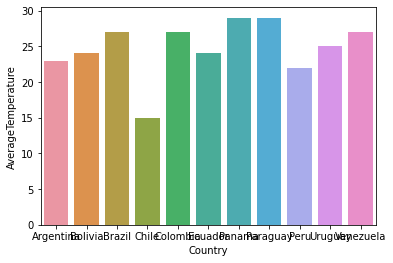

In [86]:
sns.barplot(x='Country', y='AverageTemperature', data=df_max)